# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Pasian

Student name: Francisco Ariel
    
ID: 2078684

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2078684 # place a random seed
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [60 52 78 65 59 60 59 57 54 56]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


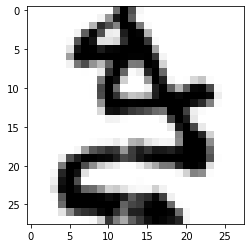

LABEL: 1
INPUT:


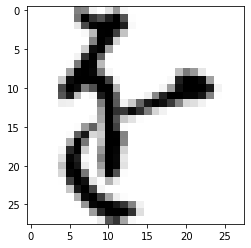

LABEL: 9
INPUT:


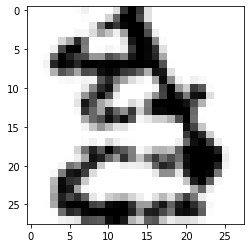

LABEL: 1
INPUT:


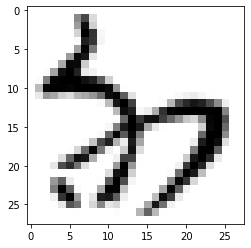

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM

grid = GridSearchCV(SVC(kernel='linear'), parameters)
grid.fit(X_train,y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
best_param = grid.best_params_
print(best_param)

print("Score with best parameters:")
print(grid.best_score_)

print("All scores on the grid:")
print(grid.cv_results_['mean_test_score'])

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.1}
Score with best parameters:
0.7633333333333333
All scores on the grid:
[0.725      0.76333333 0.76333333 0.76333333]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

grid = GridSearchCV(SVC(kernel='poly', degree=2), parameters)
grid.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
best_param = grid.best_params_
print(best_param)

print("Score with best parameters:")
print(grid.best_score_)

print("All scores on the grid:")
print(grid.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 1}
Score with best parameters:
0.7749999999999999
All scores on the grid:
[0.13       0.75       0.775      0.395      0.76833333 0.775
 0.75       0.775      0.775     ]


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

grid = GridSearchCV(SVC(kernel='poly', degree=degree), parameters)
grid.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
best_param = grid.best_params_
print(best_param)

print("Score with best parameters:")
print(grid.best_score_)

print("All scores on the grid:")
print(grid.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Score with best parameters:
0.7350000000000001
All scores on the grid:
[0.13       0.735      0.675      0.3        0.68       0.675
 0.67666667 0.675      0.675     ]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

grid = GridSearchCV(SVC(kernel='rbf'), parameters)
grid.fit(X_train,y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
best_param = grid.best_params_
print(best_param)

print("Score with best parameters:")
print(grid.best_score_)

print("All scores on the grid:")
print(grid.cv_results_['mean_test_score'])

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.82
All scores on the grid:
[0.13       0.255      0.13       0.13       0.54333333 0.775
 0.14333333 0.13       0.75833333 0.82       0.15166667 0.13
 0.76666667 0.82       0.15166667 0.13      ]


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

_First thing to notice is the performace for each kernel, the best score is achieved with the RBF kernel. Furthermore, the size of the grid for "all scores" increases when we move from linear to RBf kernel while tunning parameters._

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(C=10, kernel='rbf', gamma=0.01) # USE YOUR OPTIMAL PARAMETERS
best_SVM.fit(X_train,y_train)

training_error = 1- best_SVM.score(X_train,y_train)
test_error = 1- best_SVM.score(X_test,y_test)

# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.173250


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [105]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[  0.00   0.00   0.00   0.01   0.10   1.00  10.00 100.00]


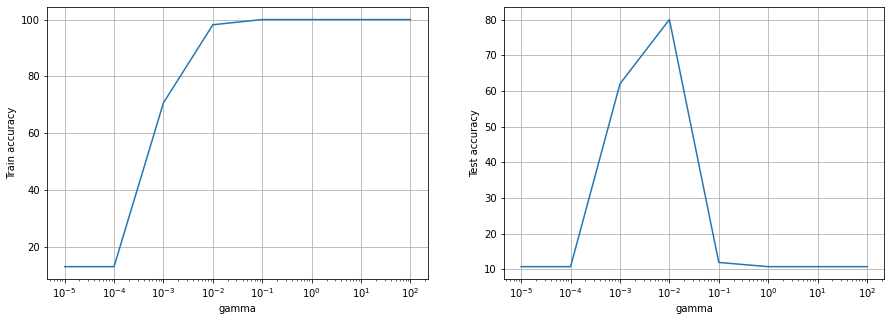

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

for i in gamma_values:
    svc = SVC(C=1, kernel='rbf', gamma=i)
    svc.fit(X_train,y_train)
    y_pred_train= svc.predict(X_train)
    y_pred_test = svc.predict(X_test)
    train_acc_list.append(skm.accuracy_score(y_train,y_pred_train)*100)
    test_acc_list.append(skm.accuracy_score(y_test,y_pred_test)*100)

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

In [15]:
train_acc_list

[13.0, 13.0, 70.66666666666667, 98.16666666666667, 100.0, 100.0, 100.0, 100.0]

In [103]:
test_acc_list

[10.725, 10.725, 62.0, 80.025, 11.899999999999999, 10.725, 10.725, 10.725]

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

_When the value of gamma is increasing the train and test error decreased as can be seen in both figures with the curve for accuary going up, however when gamma is >= 0.1 the test error increased again. The best value of gamma is achieved when the test and train accuracy reached their highest value, which is 0.01._

_Whenever the accuracy of the training set is very high, there is a low accuracy for unseen data. While the train accuracy (left figure) reached a value of 100% as the value of gamma increase, the test accuracy (right figure) value goes near 10%._

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [35]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [201 185 200 217 215 209 209 181 192 191]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [36]:
#get training and test error for the best SVM model from CV

svc = SVC(C=10, kernel='rbf', gamma=0.01) #C=1, kernel='rbf', gamma=i)
svc.fit(X_train,y_train)
y_pred_train= svc.predict(X_train)
y_pred_test = svc.predict(X_test)
training_error = 1- svc.score(X_train,y_train) #skm.accuracy_score(y_train,y_pred_train)*100
test_error = 1 - svc.score(X_test,y_test) #skm.accuracy_score(y_test,y_pred_test)*100

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.116500


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [37]:
from sklearn import linear_model

lr = linear_model.LogisticRegression(C=1000)
lr.fit(X_train, y_train)
y_pred_train= lr.predict(X_train)
y_pred_test = lr.predict(X_test)

training_error = 1 - lr.score(X_train,y_train)
test_error = 1 - lr.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.284931


C:\Users\fap_9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## TO DO 9 Try  with regularization (use C=1)¶

In [38]:
lr = linear_model.LogisticRegression(C=1)
lr.fit(X_train, y_train)
y_pred_train= lr.predict(X_train)
y_pred_test = lr.predict(X_test)

training_error = 1 - lr.score(X_train,y_train)
test_error = 1 - lr.score(X_test,y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.001000
Best regularized logistic regression test error: 0.262948


C:\Users\fap_9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

_The performance for SVM with the RBF kernel using m=2000 is better than the one with m=600, this is due to the use of more samples to train the model, althought the computational cost increased and it takes more time to run the model._

_SVM model produces a lower test error than LR model. The SVM models tries to finds the best margin for the line and the support vectors (the separating hyperplane that maximizes the distance of the closest points). It can work well if a point is not a support vector. On the other hand, LR models don't do this, instead it can find different decision boundaries and wights that are close to the optimal point because of its probabilistic behaviour. It depends how far the data is from the separating hyperplane, the further the better._

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [82]:
lr = linear_model.LogisticRegression(C=1)
lr.fit(X_train, y_train)

svc = SVC(C=10, kernel='rbf', gamma=0.01)
svc.fit(X_train,y_train)

LR_prediction = lr.predict(X_test)
SVM_prediction = svc.predict(X_test)

C:\Users\fap_9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
SVM_prediction

array([9, 4, 9, ..., 4, 4, 6], dtype=uint8)

In [84]:
LR_prediction

array([7, 6, 9, ..., 4, 4, 6], dtype=uint8)

In [85]:
y_test

array([9, 8, 9, ..., 4, 4, 6], dtype=uint8)

In [86]:
misclassified_samples = np.nonzero(LR_prediction != list(y_test))[0]
misclassified_samples

array([    0,     1,     3, ..., 57989, 57993, 57995], dtype=int64)

In [87]:
len(misclassified_samples)

15251

In [88]:
correct_samples = np.nonzero(SVM_prediction == list(y_test))[0]
correct_samples

array([    0,     2,     4, ..., 57997, 57998, 57999], dtype=int64)

In [89]:
np.nonzero(LR_prediction != list(y_test))

(array([    0,     1,     3, ..., 57989, 57993, 57995], dtype=int64),)

In [90]:
LR_prediction != list(y_test)

array([ True,  True, False, ..., False, False, False])

In [91]:
SVM_prediction == list(y_test)

array([ True, False,  True, ...,  True,  True,  True])

INPUT:


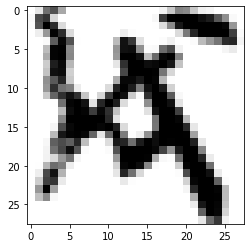

LABEL: 9
Misclassified sample: 7


In [93]:
# Misclassified
plot_input(X_test,y_test,misclassified_samples[0])
print('Misclassified sample:',LR_prediction[0])

INPUT:


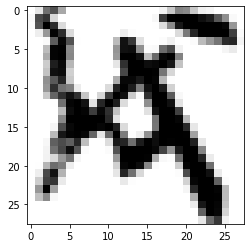

LABEL: 9
Correct sample: 9


In [94]:
# Correctly classified
plot_input(X_test,y_test, correct_samples[0])
print('Correct sample:',SVM_prediction[0])

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [60]:
np.set_printoptions(precision=2, suppress=True, floatmode='fixed') # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  skm.confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5799 5815 5800 5783 5785 5791 5791 5819 5808 5809]

 Confusion matrix SVM  
 
 [[5377    6    3   24  101   67   12   82   89   38]
 [  29 5027  143   56  126   27  165    3   79  160]
 [   0  118 4623  147   84   50  372   20  250  136]
 [   8   64   88 5376   64   42   20   14   93   14]
 [ 185  112  101   58 5004   14   85   51   87   88]
 [  46   56  142  146   67 5165   36   21   99   13]
 [   7  136  334   33  142   24 5041   22   37   15]
 [  88   21   56  105  164   25  104 5190   30   36]
 [  22  145   74   96   29   51  172   10 5181   28]
 [  15  127  147   35  123   27    9   17   50 5259]]

 Confusion matrix SVM (normalized)   
 
 [[0.93 0.00 0.00 0.00 0.02 0.01 0.00 0.01 0.02 0.01]
 [0.00 0.86 0.02 0.01 0.02 0.00 0.03 0.00 0.01 0.03]
 [0.00 0.02 0.80 0.03 0.01 0.01 0.06 0.00 0.04 0.02]
 [0.00 0.01 0.02 0.93 0.01 0.01 0.00 0.00 0.02 0.00]
 [0.03 0.02 0.02 0.01 0.86 0.00 0.01 0.01 0.02 0.02]
 [0.01 0.01 0.02 0.03 0.01 0.89 0.01 0.00 0.0

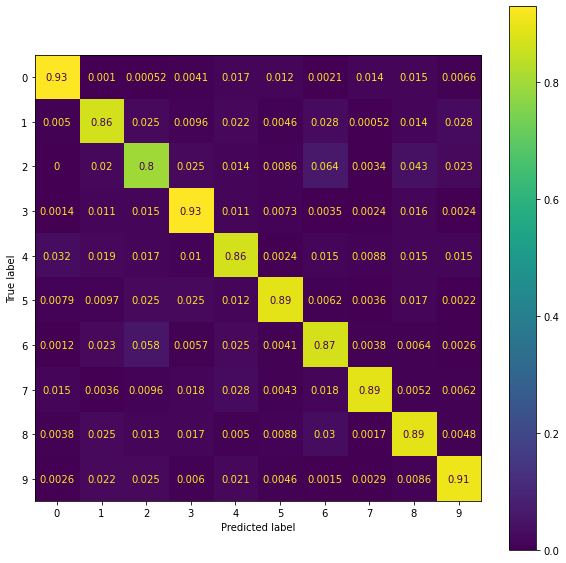

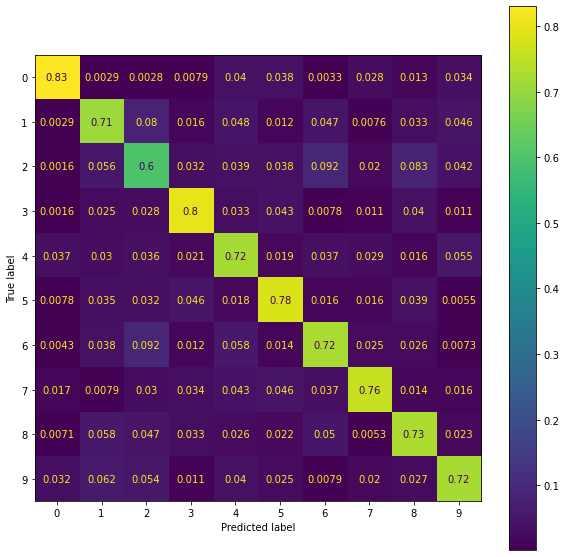

In [100]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

fig, ax = plt.subplots(figsize=(10,10))
skm.ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test,normalize = 'true',ax=ax)
plt.show()

fig, ax1 = plt.subplots(figsize=(10,10))
skm.ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test,normalize = 'true',ax=ax1)
plt.show()

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

_The SVM gives the best accuracies for predicting all the classes (see diagonal of the first matrix above). The model can predict with high accuracy the classes 0 and 3. The lowest accuracy is for the class 2, however the model doesn't confuse samples from class 2 with class 0, i.e., the classification boundary between those classes was learned well._
_The confusion matrix for the LR has a poor performance (see diagonal of the second matrix above), the best results are for classes 0 and 3, and worst classification is for class 2. Furthermore, there is no samples that have been classified well by the model, i.e., with value 0._
_To sum up, the higher accuraries_